In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Define the stock symbol and time period
stock_symbol = "AAPL"
start_date = "2010-01-01"

In [3]:
# Fetch historical stock data
df = yf.download(stock_symbol, start=start_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481927,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-15,171.169998,172.619995,170.289993,172.619995,172.619995,121664700
2024-03-18,175.570007,177.710007,173.520004,173.720001,173.720001,75604200
2024-03-19,174.339996,176.610001,173.029999,176.080002,176.080002,55215200
2024-03-20,175.720001,178.669998,175.089996,178.669998,178.669998,53423100
2024-03-21,177.050003,177.490005,170.839996,171.369995,171.369995,105906200


In [6]:
df.shape

(3578, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3578 entries, 2010-01-04 to 2024-03-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3578 non-null   float64
 1   High       3578 non-null   float64
 2   Low        3578 non-null   float64
 3   Close      3578 non-null   float64
 4   Adj Close  3578 non-null   float64
 5   Volume     3578 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 195.7 KB


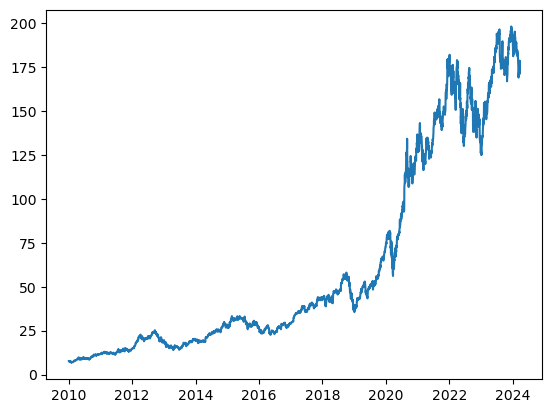

In [8]:
plt.plot(df.Close)

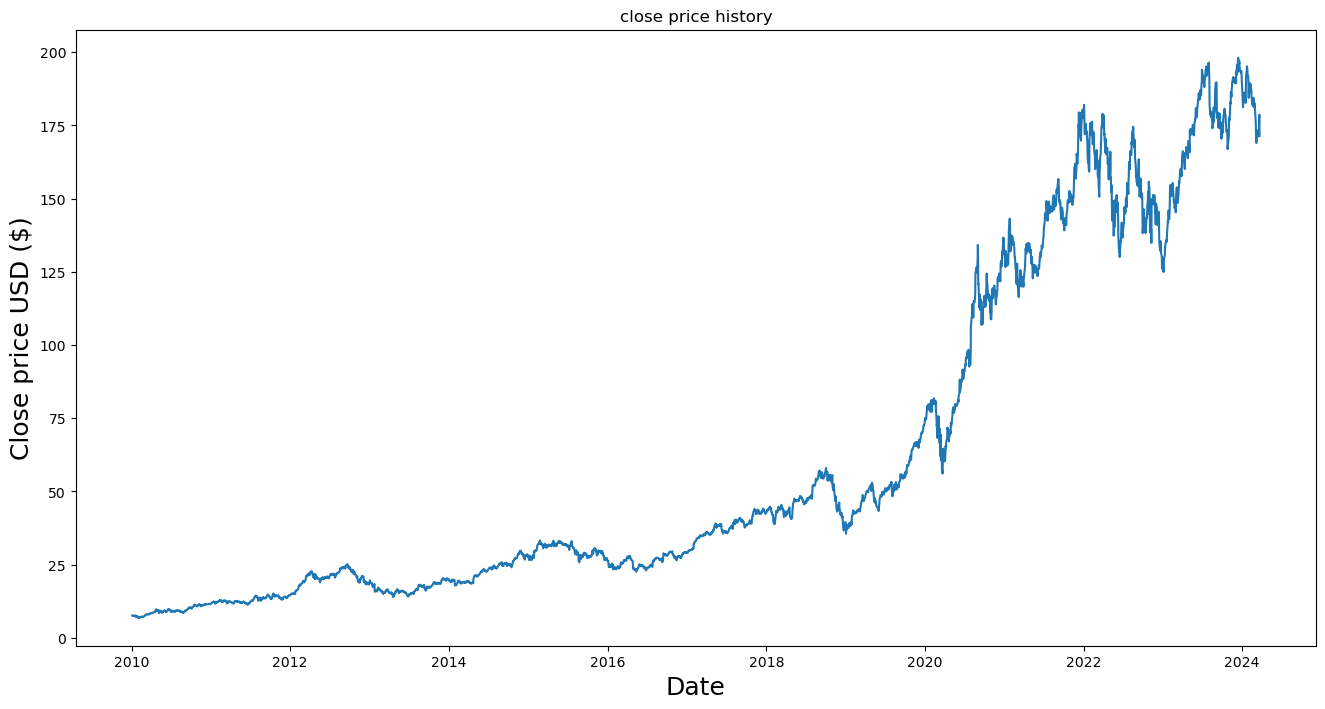

In [9]:
# visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [10]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2863

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00410081],
       [0.00416991],
       [0.00353313],
       ...,
       [0.88481111],
       [0.8983535 ],
       [0.86018376]])

In [12]:
#Create the training data set
#create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([4.10081399e-03, 4.16990948e-03, 3.53312539e-03, 3.46029250e-03,
       3.72172994e-03, 3.37253003e-03, 2.92621544e-03, 3.47336463e-03,
       3.24554370e-03, 2.59195259e-03, 4.29315593e-03, 3.67504878e-03,
       2.99157355e-03, 1.06441674e-03, 2.05787553e-03, 2.59382004e-03,
       2.95609707e-03, 1.35199593e-03, 1.86495266e-06, 5.00460545e-04,
       7.11476946e-04, 1.34079126e-03, 0.00000000e+00, 6.36779110e-04,
       3.86548837e-04, 7.73102661e-04, 5.73288442e-04, 1.23621678e-03,
       1.55554505e-03, 2.11950124e-03, 1.96077333e-03, 2.03173129e-03,
       1.79643809e-03, 1.56301234e-03, 9.35565469e-04, 1.60783353e-03,
       1.85806380e-03, 2.34732217e-03, 3.16338107e-03, 3.13723683e-03,
       3.22686675e-03, 3.48456930e-03, 5.02331232e-03, 5.04758912e-03,
       5.78334535e-03, 6.12321054e-03, 6.24645698e-03, 6.45187603e-03,
       5.93647342e-03, 6.05038264e-03, 5.98875942e-03, 6.08773156e-03,
       5.63955451e-03, 6.10640602e-03, 6.78053654e-03, 6.96914608e-03,
     

In [13]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2803, 60, 1)

In [15]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 65s 23ms/step - loss: 9.3924e-05
Epoch 2/4
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 64s 23ms/step - loss: 1.0978e-04
Epoch 3/4
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 66s 23ms/step - loss: 8.3998e-05
Epoch 4/4
2803/2803 ━━━━━━━━━━━━━━━━━━━━ 64s 23ms/step - loss: 1.0193e-04


In [45]:
#create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [46]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [47]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [48]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [49]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.609857657906059

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test, predictions)

0.9269859758017349

C:\Users\Dell\AppData\Local\Temp\ipykernel_12312\556903536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


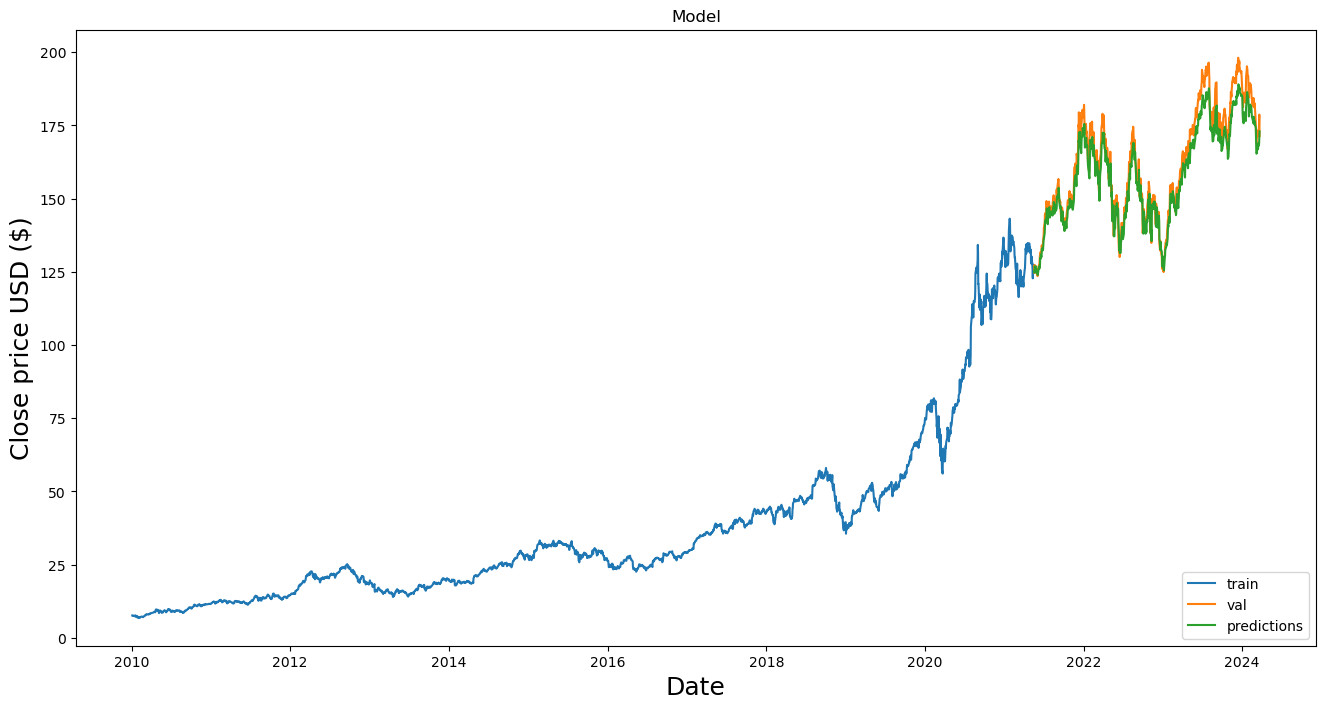

In [52]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['train', 'val', 'predictions'], loc='lower right')
plt.show()

In [53]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-05-19,124.690002,125.126167
2021-05-20,127.309998,124.687485
2021-05-21,125.430000,126.884689
2021-05-24,127.099998,125.798859
2021-05-25,126.900002,126.760994
...,...,...
2024-03-15,172.619995,168.107727
2024-03-18,173.720001,168.106247
2024-03-19,176.080002,168.904602


In [54]:
#Get the quote
stock_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2023-12-28"

apple_quote = yf.download(stock_symbol, start=start_date, end=end_date)
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[185.1097]]


In [55]:
#Get the quote
stock_symbol = "AAPL"
start_date = "2023-12-2"
end_date = "2023-12-30"

apple_quote2 = yf.download(stock_symbol, start=start_date, end=end_date)
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2023-12-04    189.429993
2023-12-05    193.419998
2023-12-06    192.320007
2023-12-07    194.270004
2023-12-08    195.710007
2023-12-11    193.179993
2023-12-12    194.710007
2023-12-13    197.960007
2023-12-14    198.110001
2023-12-15    197.570007
2023-12-18    195.889999
2023-12-19    196.940002
2023-12-20    194.830002
2023-12-21    194.679993
2023-12-22    193.600006
2023-12-26    193.050003
2023-12-27    193.149994
2023-12-28    193.580002
2023-12-29    192.529999
Name: Close, dtype: float64


In [56]:
pred_price

array([[185.1097]], dtype=float32)

In [30]:
model.save('stock price prediction model.keras')